In [57]:
# importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import fastparquet

In [83]:
# cambiar csv a parquet

# years = [2022]

# months = [7, 8, 9]

# conceptos=['Convencion_Constitucional',
# 	'Proceso_Constituyente',
# 	'Nueva_Constitucion',
# 	'Convencion_Constituyente']

# for year in years:
# 	for month in months:
# 		for concepto in conceptos:
# 			try:
# 				newtweets = pd.read_csv('datasets/' + str(year) + '/' + concepto + '_' + str(year) + '_' + str(month) + '.csv', index_col=0)
# 				newtweets['date'] = pd.to_datetime(newtweets['date'], utc=True)
# 				newtweets['replyCount'] = newtweets['replyCount'].astype('int32')
# 				newtweets['retweetCount'] = newtweets['retweetCount'].astype('int32')
# 				newtweets['likeCount'] = newtweets['likeCount'].astype('int32')
# 				newtweets['quoteCount'] = newtweets['quoteCount'].astype('int32')
# 				newtweets['user_verified'] = newtweets['user_verified'].astype('bool')
# 				newtweets.to_parquet('datasets/' + str(year) + '/' + concepto + '_' + str(year) + '_' + str(month) + '.parquet', compression='gzip')
# 			except:
# 				print('No se encuentra ' + concepto + '_' + str(year) + '_' + str(month) + '.csv')

In [84]:
# Concatenar las busquedas de los tweets
years = [2019, 2020, 2021, 2022]

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

conceptos=['Convencion_Constitucional',
	'Proceso_Constituyente',
	'Nueva_Constitucion',
	'Convencion_Constituyente']

tweets = pd.DataFrame()

for year in years:
	for month in months:
		for concepto in conceptos:
			try:
				newtweets = pd.read_parquet('datasets/' + str(year) + '/' + concepto + '_' + str(year) + '_' + str(month) + '.parquet')
				newtweets['archivo'] = concepto + '_' + str(year) + '_' + str(month) + '.parquet'
				newtweets['keyword'] = concepto
				newtweets['date_day'] = newtweets['date'].dt.date.astype('datetime64[ns]')
				newtweets['date_week'] = newtweets['date'].dt.strftime('%Y-%W')
				newtweets['date_month'] = newtweets['date'].dt.strftime('%Y-%m')
				tweets = pd.concat([tweets, newtweets])
				print('Agregado ' + concepto + '_' + str(year) + '_' + str(month) + '.parquet -> ' + str(len(newtweets)) + ' tweets')
			except:
				print('No se encuentra ' + concepto + '_' + str(year) + '_' + str(month) + '.parquet')

tweets.shape

No se encuentra Convencion_Constitucional_2019_1.parquet
No se encuentra Proceso_Constituyente_2019_1.parquet
No se encuentra Nueva_Constitucion_2019_1.parquet
No se encuentra Convencion_Constituyente_2019_1.parquet
No se encuentra Convencion_Constitucional_2019_2.parquet
No se encuentra Proceso_Constituyente_2019_2.parquet
No se encuentra Nueva_Constitucion_2019_2.parquet
No se encuentra Convencion_Constituyente_2019_2.parquet
No se encuentra Convencion_Constitucional_2019_3.parquet
No se encuentra Proceso_Constituyente_2019_3.parquet
No se encuentra Nueva_Constitucion_2019_3.parquet
No se encuentra Convencion_Constituyente_2019_3.parquet
No se encuentra Convencion_Constitucional_2019_4.parquet
No se encuentra Proceso_Constituyente_2019_4.parquet
No se encuentra Nueva_Constitucion_2019_4.parquet
No se encuentra Convencion_Constituyente_2019_4.parquet
No se encuentra Convencion_Constitucional_2019_5.parquet
No se encuentra Proceso_Constituyente_2019_5.parquet
No se encuentra Nueva_Cons

(2203342, 23)

In [85]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2203342 entries, 1154909051546984454 to 1565127657737650177
Data columns (total 23 columns):
 #   Column                    Dtype              
---  ------                    -----              
 0   date                      datetime64[ns, UTC]
 1   rawContent                object             
 2   replyCount                int32              
 3   retweetCount              int32              
 4   likeCount                 int32              
 5   quoteCount                int32              
 6   lang                      object             
 7   place                     object             
 8   hashtags                  object             
 9   mentionedUsers            object             
 10  user_id                   object             
 11  user_name                 object             
 12  user_renderedDescription  object             
 13  user_join_date            object             
 14  user_followers            object    

In [86]:
tweets = tweets[~tweets.index.duplicated(keep='first')]
tweets.shape

(2184496, 23)

In [87]:
# sort tweets by date
tweets = tweets.sort_values(by='date', ascending=True)

In [88]:
# lista de días entre dos fechas
def lista_dias(fecha_inicio, fecha_fin):

    inicio = datetime.datetime.strptime(fecha_inicio, '%d/%m/%Y')
    fin = datetime.datetime.strptime(fecha_fin, '%d/%m/%Y')

    delta = fin - inicio

    dias = []

    for i in range(delta.days + 1):
        nueva_fecha = inicio + datetime.timedelta(days=i)
        dias.append(nueva_fecha)

    df = pd.DataFrame(dias, columns=['date_day'])

    return df

dias_tweets = lista_dias('17/11/2019', '10/09/2022')
dias_tweets['date_day'] = dias_tweets['date_day']

# merge con lista de días
tweets_por_dia = tweets[['date_day','keyword']].pivot_table(index='date_day', columns='keyword', aggfunc='size')
dias_tweets = dias_tweets.merge(tweets_por_dia, on='date_day', how='left')

dias_tweets.to_csv('datasets/tweets_por_dia.csv')

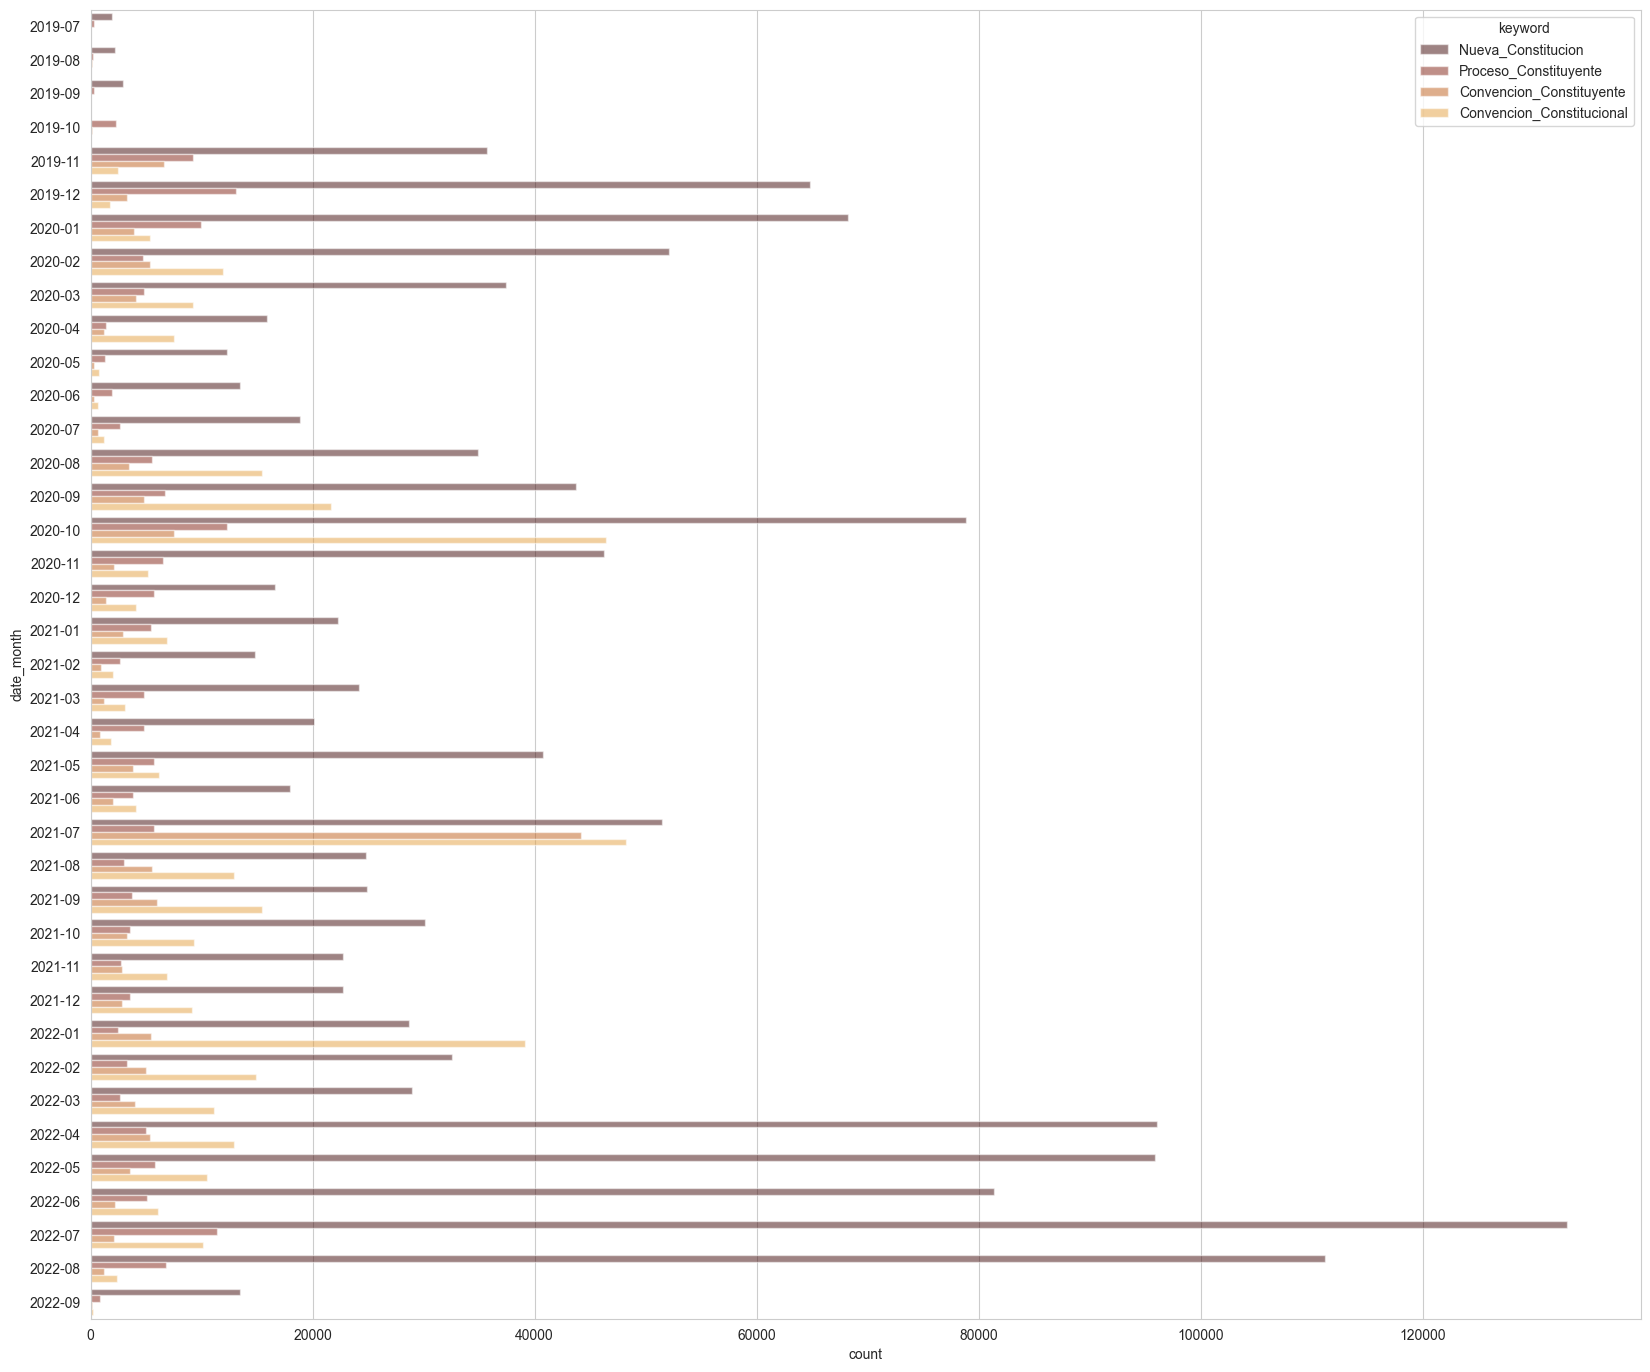

In [92]:
sns.set_style('whitegrid')
sns.set_palette('afmhot')

fig, ax = plt.subplots(figsize=(20, 17))
sns.countplot(y='date_month', data=tweets, ax=ax, alpha=0.5, hue='keyword', orient='h')
plt.show()

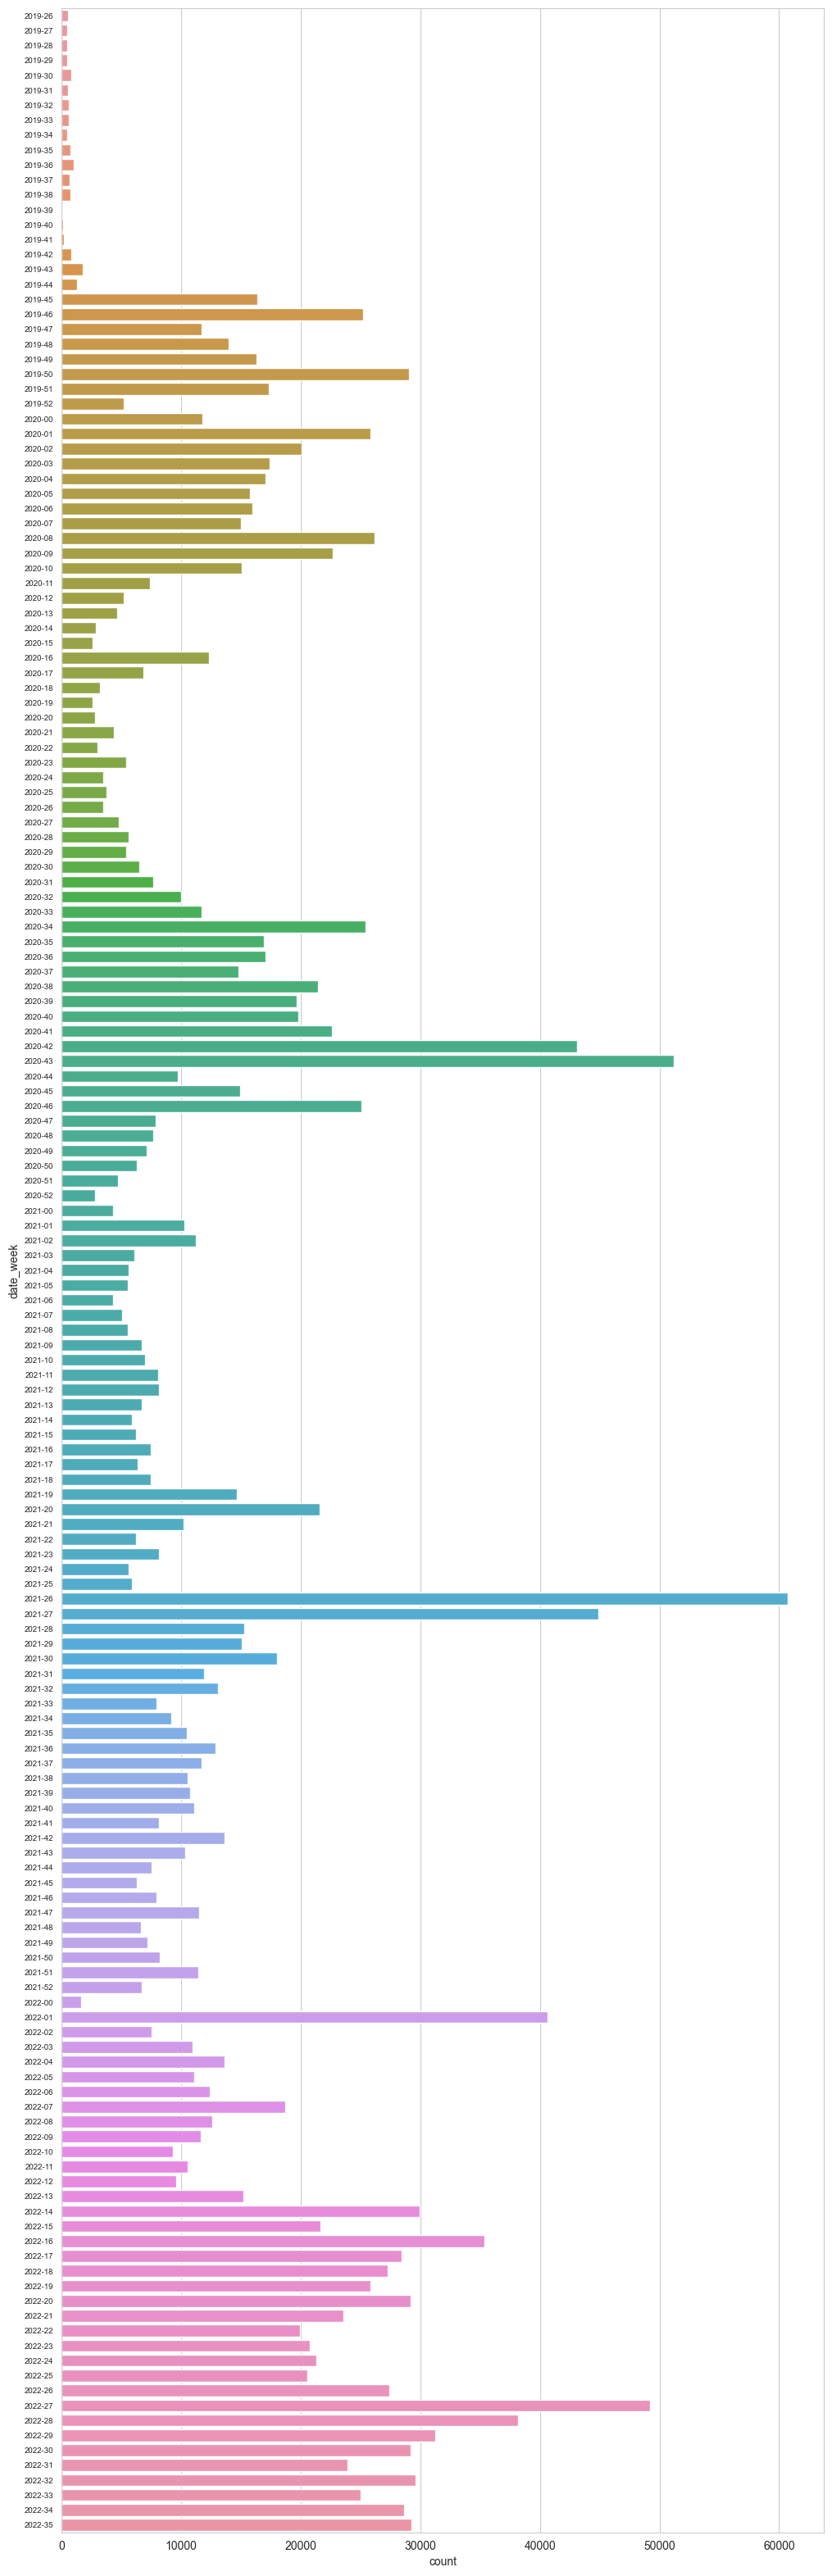

In [93]:

fig, ax = plt.subplots(figsize=(12, 40))
sns.countplot(y='date_week', data=tweets, ax=ax, orient='h')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)
plt.show()

In [94]:
hashtags = tweets[tweets['hashtags'].isna() == False]['hashtags']

total_hashtags = []

for i in hashtags:
	i = i.replace('[', '').replace(']', '').replace("'", '').split(', ')
	for j in i:
		total_hashtags.append(j)

total_hashtags = pd.Series(total_hashtags)
total_hashtags.to_csv('datasets/hashtags.csv', index=False)
total_hashtags.head()

0    NuevaConstitución
1    NuevaConstitucion
2           capellanes
3        ReportajesT13
4    NuevaConstitucion
dtype: object

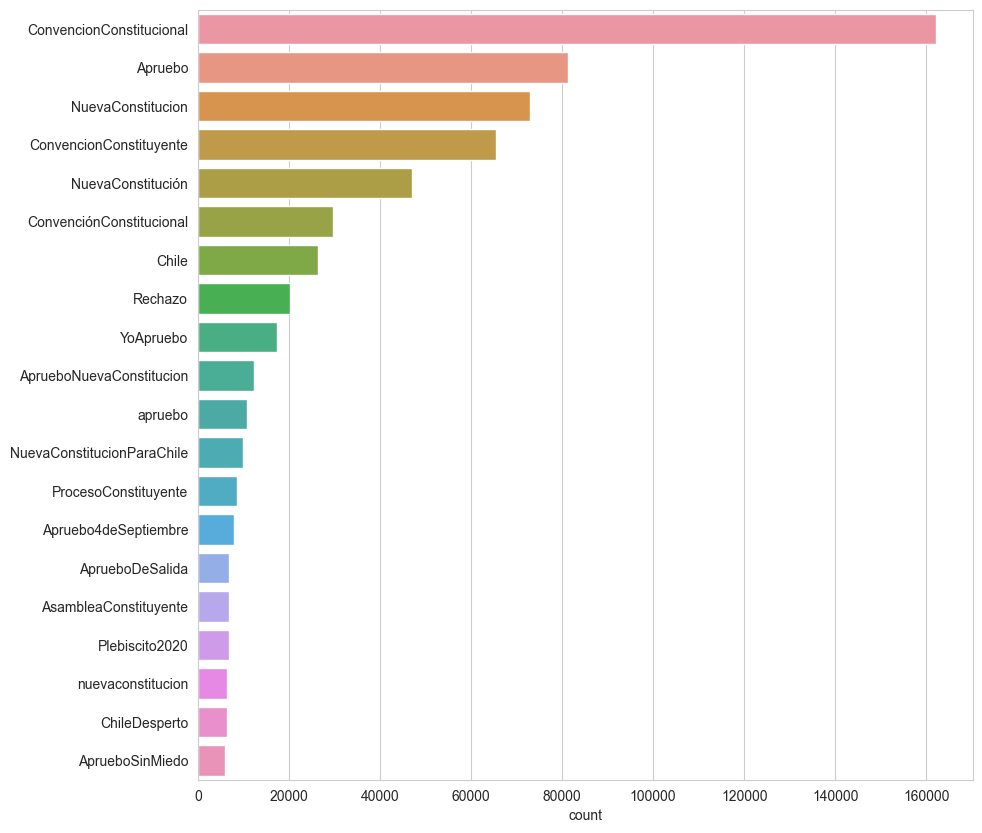

In [95]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(y=total_hashtags, order=total_hashtags.value_counts()[:20].index, ax=ax)
plt.show()